In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [59]:
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"


In [60]:
f='/Users/ursuo/Downloads/K562_gwps_normalized_bulk_01.h5ad'

adata=sc.read(f)
adata

AnnData object with n_obs × n_vars = 11258 × 8248
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv'

In [61]:
genes=['_'+g+'_' for g in ['ARID2', 'SMARCC2', 'DPF1', 'BRD9', 'BCL7C', 'DPF2', 
                           'SMARCD2', 'BCL7B', 'SS18L', 'BRD7', 'control', 'PHF10', 
                           'SMARCB1', 'SMARCD3', 'GLTSCR1L', 'SMARCC1', 'ACTL6A', 
                           'GLTSCR1', 'PBRM1', 'ARID1B', 'ACTL6B', 'SS18', 'SMARCA2', 
                           'ARID1A', 'DPF3', 'SMARCD1', 'SMARCE1', 'BCL7A', 'SMARCA4',
                           'GLTSCR',
                          ]
      ]

In [62]:
genes_x=[]
for g in adata.obs_names:
    for g2 in genes:
        if g2 in g:
            genes_x.append(g)

print(genes_x)

['106_ACTL6A_P1P2_ENSG00000136518', '2340_DPF1_P2_ENSG00000011332', '2341_DPF1_P1_ENSG00000011332', '2342_DPF2_P2_ENSG00000133884', '2343_DPF2_P1_ENSG00000133884', '2344_DPF3_P1P2_ENSG00000205683', '486_ARID1A_P1P2_ENSG00000117713', '487_ARID1B_P1_ENSG00000049618', '488_ARID1B_P2_ENSG00000049618', '489_ARID2_P1P2_ENSG00000189079', '6102_PBRM1_P1P2_ENSG00000163939', '6279_PHF10_P1P2_ENSG00000130024', '806_BCL7A_P1P2_ENSG00000110987', '807_BCL7B_P1P2_ENSG00000106635', '808_BCL7C_P1P2_ENSG00000099385', '8141_SMARCA2_P1P2_ENSG00000080503', '8142_SMARCA4_P1P2_ENSG00000127616', '8146_SMARCB1_P1_ENSG00000099956', '8147_SMARCB1_P2_ENSG00000099956', '8148_SMARCC1_P1P2_ENSG00000173473', '8149_SMARCC2_P1P2_ENSG00000139613', '8150_SMARCD1_P1P2_ENSG00000066117', '8151_SMARCD2_P1P2_ENSG00000108604', '8152_SMARCD3_P2_ENSG00000082014', '8153_SMARCD3_P1_ENSG00000082014', '8154_SMARCE1_P1P2_ENSG00000073584', '8445_SS18_P1P2_ENSG00000141380', '892_BRD7_P1P2_ENSG00000166164', '894_BRD9_P1P2_ENSG0000002831

In [63]:
adata[genes_x,:]

View of AnnData object with n_obs × n_vars = 29 × 8248
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv'

In [64]:
adata_baf=pd.DataFrame(adata[genes_x,:].copy().X,index=genes_x,
                       columns=adata.var_names)
adata_baf

gene_id,ENSG00000237491,ENSG00000228794,ENSG00000188976,ENSG00000187961,ENSG00000188290,ENSG00000187608,ENSG00000078808,ENSG00000176022,ENSG00000160087,ENSG00000131584,...,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000278704,ENSG00000278384,ENSG00000271254,ENSG00000276345
106_ACTL6A_P1P2_ENSG00000136518,-0.161434,0.032726,-0.248848,-0.208126,-0.175792,-0.274656,-0.037157,-0.036432,0.179452,0.195263,...,1.412229,-0.043110,0.542325,0.327696,0.637400,0.350393,0.086517,0.397635,-0.050608,0.073373
2340_DPF1_P2_ENSG00000011332,0.002622,-0.014988,0.066860,-0.022745,0.044102,0.009782,0.092112,0.118143,0.061319,-0.095373,...,-0.001501,-0.001749,0.051146,0.151031,-0.051456,0.019200,0.080948,0.091444,0.006118,-0.013674
2341_DPF1_P1_ENSG00000011332,-0.177039,0.016042,0.030442,-0.084635,-0.094774,0.027072,-0.066171,-0.016188,0.129070,-0.043732,...,-0.024054,-0.022484,0.111757,-0.099393,-0.160196,0.012734,0.030287,0.123943,-0.003698,0.022543
2342_DPF2_P2_ENSG00000133884,-0.079701,0.061004,-0.006742,0.026280,0.039747,0.132498,0.050222,0.003959,0.032581,0.022711,...,-0.140486,0.041846,-0.072086,-0.076229,0.007737,-0.093307,-0.117160,-0.066092,-0.104230,-0.074094
2343_DPF2_P1_ENSG00000133884,-0.016209,0.000334,0.110427,0.037799,0.083329,-0.027667,0.018533,0.110802,0.021495,0.008697,...,0.336037,0.256290,0.220811,0.200596,0.139097,0.348037,0.249385,0.017874,0.227373,-0.051323
2344_DPF3_P1P2_ENSG00000205683,-0.043122,-0.067288,0.012953,0.334685,-0.142197,-0.058031,0.134667,-0.069493,-0.008277,0.055745,...,0.025760,0.045841,-0.077861,-0.049190,0.033950,-0.083198,-0.021616,-0.071679,0.092101,0.087793
486_ARID1A_P1P2_ENSG00000117713,0.043111,0.086376,0.006589,0.003498,0.043850,0.005191,-0.022027,0.228155,-0.052753,0.121972,...,0.357379,0.166656,0.556870,0.119341,-0.213050,0.616166,-0.061732,0.007677,0.193441,0.007090
487_ARID1B_P1_ENSG00000049618,-0.009520,0.007971,0.018872,0.126858,-0.000257,0.017596,-0.004703,0.193134,0.057150,-0.031003,...,-0.004426,-0.091913,0.040402,0.008001,0.027290,-0.130477,-0.032459,-0.085907,-0.092918,-0.006533
488_ARID1B_P2_ENSG00000049618,-0.028803,-0.010980,0.006997,-0.101582,0.028774,0.007785,0.032161,-0.065577,-0.022212,-0.007671,...,0.089846,0.043536,0.188079,0.099048,-0.082138,0.126534,0.020437,-0.090727,0.105343,-0.030168
489_ARID2_P1P2_ENSG00000189079,0.064485,0.068289,0.009112,-0.070752,0.330074,0.065916,-0.101994,-0.068493,0.025495,-0.011163,...,0.780953,0.196952,0.188388,0.381580,0.337812,0.365488,-0.000491,0.002939,0.089895,-0.122863


In [65]:
#Revise gene names
revised_names=[]
for i in range(len(genes_x)):
    long_name=genes_x[i]
    num,gene,p1p2,ens=long_name.split('_')
    revised_names.append(gene+'_'+p1p2)
print(revised_names)
adata_baf.index=revised_names

['ACTL6A_P1P2', 'DPF1_P2', 'DPF1_P1', 'DPF2_P2', 'DPF2_P1', 'DPF3_P1P2', 'ARID1A_P1P2', 'ARID1B_P1', 'ARID1B_P2', 'ARID2_P1P2', 'PBRM1_P1P2', 'PHF10_P1P2', 'BCL7A_P1P2', 'BCL7B_P1P2', 'BCL7C_P1P2', 'SMARCA2_P1P2', 'SMARCA4_P1P2', 'SMARCB1_P1', 'SMARCB1_P2', 'SMARCC1_P1P2', 'SMARCC2_P1P2', 'SMARCD1_P1P2', 'SMARCD2_P1P2', 'SMARCD3_P2', 'SMARCD3_P1', 'SMARCE1_P1P2', 'SS18_P1P2', 'BRD7_P1P2', 'BRD9_P1P2']


In [66]:
import seaborn as sns

In [67]:
corr=perturb.util.corr_mat(adata_baf)

/Users/ursuo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [68]:
corr

,ACTL6A_P1P2,DPF1_P2,DPF1_P1,DPF2_P2,DPF2_P1,DPF3_P1P2,ARID1A_P1P2,ARID1B_P1,ARID1B_P2,ARID2_P1P2,...,SMARCC1_P1P2,SMARCC2_P1P2,SMARCD1_P1P2,SMARCD2_P1P2,SMARCD3_P2,SMARCD3_P1,SMARCE1_P1P2,SS18_P1P2,BRD7_P1P2,BRD9_P1P2
ACTL6A_P1P2,1.000000,0.016397,0.032324,0.002454,0.067921,0.021198,0.043536,0.040567,0.026501,0.047122,...,0.113659,0.033220,0.047487,0.041815,-0.043720,0.013768,0.103284,0.001033,-0.014242,0.039574
DPF1_P2,0.016397,1.000000,-0.031855,0.003758,-0.030122,0.025930,0.020962,-0.035060,-0.015141,-0.006919,...,0.003080,-0.005582,-0.022463,-0.001559,0.005262,0.006859,-0.029741,-0.004212,-0.006463,-0.015400
DPF1_P1,0.032324,-0.031855,1.000000,-0.004920,-0.000396,0.001727,0.003211,0.015220,-0.011594,0.035483,...,0.039429,0.006578,0.003566,0.002244,-0.006592,0.017130,0.003621,-0.010656,0.038472,-0.001417
DPF2_P2,0.002454,0.003758,-0.004920,1.000000,0.063877,-0.010612,-0.006890,0.026484,-0.011639,-0.001047,...,-0.041247,0.016014,0.038773,0.020794,-0.033691,-0.012295,0.025709,0.025159,-0.040272,0.059930
DPF2_P1,0.067921,-0.030122,-0.000396,0.063877,1.000000,-0.021382,-0.011254,0.040346,0.019685,0.063625,...,0.080951,0.046260,0.017394,0.040305,-0.007675,-0.025101,0.087196,0.014008,-0.012254,0.039964
DPF3_P1P2,0.021198,0.025930,0.001727,-0.010612,-0.021382,1.000000,0.016712,-0.020163,-0.024584,-0.002366,...,0.021748,0.002088,-0.012359,0.003685,-0.018601,-0.002409,0.007795,-0.009097,0.008104,0.008287
ARID1A_P1P2,0.043536,0.020962,0.003211,-0.006890,-0.011254,0.016712,1.000000,0.040100,0.087395,-0.014487,...,0.110004,-0.036315,-0.013407,0.006603,-0.013336,-0.006374,0.089489,0.137621,0.005211,-0.004418
ARID1B_P1,0.040567,-0.035060,0.015220,0.026484,0.040346,-0.020163,0.040100,1.000000,0.018629,0.028556,...,0.042677,0.009276,0.003100,0.020054,-0.018182,-0.027230,0.024453,0.014505,-0.030135,-0.002320
ARID1B_P2,0.026501,-0.015141,-0.011594,-0.011639,0.019685,-0.024584,0.087395,0.018629,1.000000,-0.015045,...,0.032274,0.000084,-0.020176,0.009242,0.033503,-0.011791,0.025678,0.071047,-0.020381,-0.006324
ARID2_P1P2,0.047122,-0.006919,0.035483,-0.001047,0.063625,-0.002366,-0.014487,0.028556,-0.015045,1.000000,...,0.116063,-0.012962,-0.030554,-0.008971,0.008883,-0.015500,0.047073,-0.056028,0.021786,0.002472


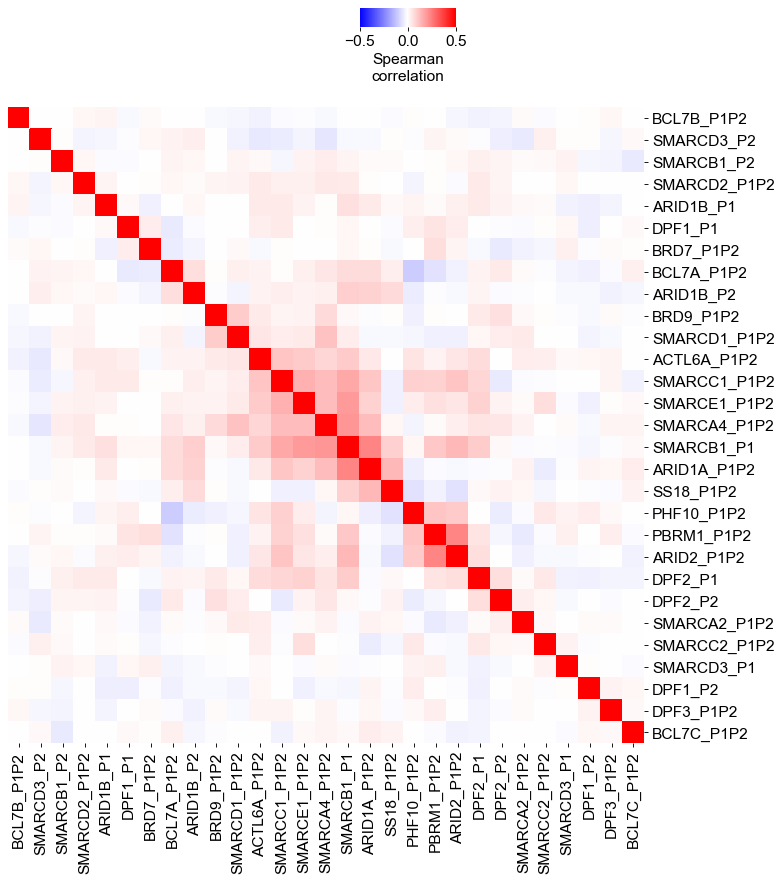

In [73]:
from scipy.cluster import hierarchy
import seaborn as sns

col_Z = hierarchy.linkage(corr,
                     optimal_ordering=True,
                          #metric='cityblock',
                     #method='complete',
                         )

x=0.5
g=sns.clustermap(corr,cmap='bwr',vmin=-x,vmax=x,
               col_linkage=col_Z,
               row_linkage=col_Z,
               figsize=(12,12),xticklabels=True,yticklabels=True,
               cbar_pos=(0.55, 0.9, 0.1, 0.02),
                 cbar_kws={'orientation':'horizontal',
                "label": "Spearman\ncorrelation",
                'ticks':[-x,0,x]},
               
              )
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

plt.savefig(FIGS+'K562.corr.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'K562.corr.heatmap.png',transparent=True,bbox_inches='tight')


In [16]:
adata[genes_x,:]

View of AnnData object with n_obs × n_vars = 29 × 8248
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv'

(29, 8248)
Index(['ENSG00000237491', 'ENSG00000228794', 'ENSG00000188976',
       'ENSG00000187961', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000078808', 'ENSG00000176022', 'ENSG00000160087',
       'ENSG00000131584',
       ...
       'ENSG00000198840', 'ENSG00000212907', 'ENSG00000198886',
       'ENSG00000198786', 'ENSG00000198695', 'ENSG00000198727',
       'ENSG00000278704', 'ENSG00000278384', 'ENSG00000271254',
       'ENSG00000276345'],
      dtype='object', name='gene_id', length=8248)


In [21]:
coef=coef.fillna(0)
coef=adata_baf
print(coef.shape)
print(coef.columns)
adata.uns['coef.gene2']=coef

(29, 8248)
Index(['ENSG00000237491', 'ENSG00000228794', 'ENSG00000188976',
       'ENSG00000187961', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000078808', 'ENSG00000176022', 'ENSG00000160087',
       'ENSG00000131584',
       ...
       'ENSG00000198840', 'ENSG00000212907', 'ENSG00000198886',
       'ENSG00000198786', 'ENSG00000198695', 'ENSG00000198727',
       'ENSG00000278704', 'ENSG00000278384', 'ENSG00000271254',
       'ENSG00000276345'],
      dtype='object', name='gene_id', length=8248)


(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 1.200e+01,
        1.100e+01, 1.800e+01, 2.800e+01, 2.700e+01, 5.300e+01, 8.200e+01,
        1.190e+02, 1.630e+02, 2.710e+02, 3.890e+02, 5.280e+02, 6.500e+02,
        1.041e+03, 1.616e+03, 2.291e+03, 2.546e+03, 2.216e+03, 1.476e+03,
        9.620e+02, 5.480e+02, 3.490e+02, 2.540e+02, 1.990e+02, 1.410e+02,
        1.060e+02, 8.700e+01, 4.000e+01, 4.600e+01, 3.800e+01, 2.300e+01,
        2.400e+01, 2.700e+01, 1.200e+01, 1.100e+01, 5.000e+00, 7.000e+00,
        1.100e+01, 6.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

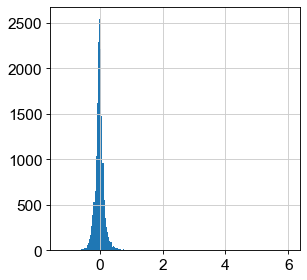

In [29]:
plt.hist(np.array(adata_baf.iloc[:2,:]).flatten(),200)

In [30]:
MAX_VALUE=2
coef[coef>MAX_VALUE]=2

In [44]:
sc.pp.scale(adata)

/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_utils.py:12: RuntimeWarning: invalid value encountered in subtract
  var = mean_sq - mean ** 2
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:794: RuntimeWarning: invalid value encountered in subtract
  X -= mean


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:25)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


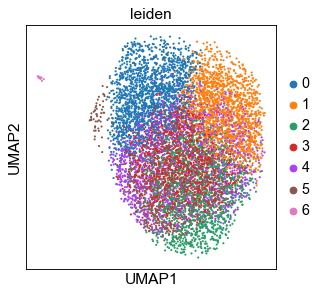

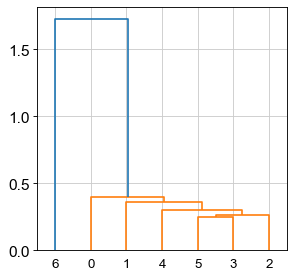

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


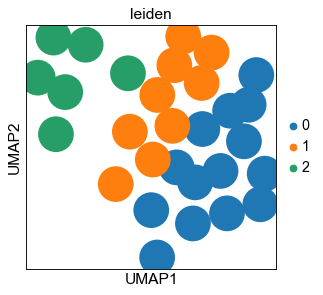

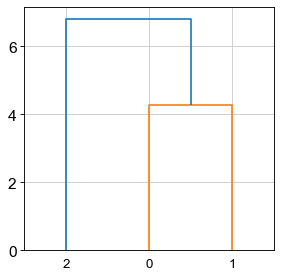

In [56]:
perturb.tl.gene_programs_and_perturbation_modules(adata,
                                                  input_type='coef',
                                                  perturbation_name='gene2',
                                           n_neighbors_programs=100,
                                                  n_neighbors_modules=5,
                                                  cluster_within=False,
                                                  copy=False,cmap_programs='Set2',
                                                  cmap_modules='Set2')

In [57]:
n='coef'
sc_bulk=adata.uns[n+'.gene2'].T.loc[adata.var_names,:]
sc_bulk['module']=adata.var[n+'.gene2.program']
sc_bulk=sc_bulk.sort_values(by='module')
sc_bulk=sc_bulk.drop(columns=['module'])
gene_pro_color=pd.DataFrame({'gene program':adata.var[n+'.gene2.program_color']},
                           index=adata.var_names)

Index(['ACTL6A_P1P2', 'BCL7B_P1P2', 'SMARCA2_P1P2', 'BRD9_P1P2', 'DPF3_P1P2',
       'DPF1_P1', 'BRD7_P1P2', 'SMARCB1_P1', 'ARID1A_P1P2', 'SMARCB1_P2',
       'BCL7A_P1P2', 'DPF2_P2', 'SMARCD1_P1P2', 'SMARCD3_P1', 'ARID1B_P2',
       'DPF1_P2', 'SMARCC2_P1P2', 'SMARCD3_P2', 'SMARCD2_P1P2', 'ARID1B_P1',
       'BCL7C_P1P2', 'ARID2_P1P2', 'PBRM1_P1P2', 'SMARCA4_P1P2', 'DPF2_P1',
       'SS18_P1P2', 'SMARCC1_P1P2', 'PHF10_P1P2', 'SMARCE1_P1P2'],
      dtype='object')


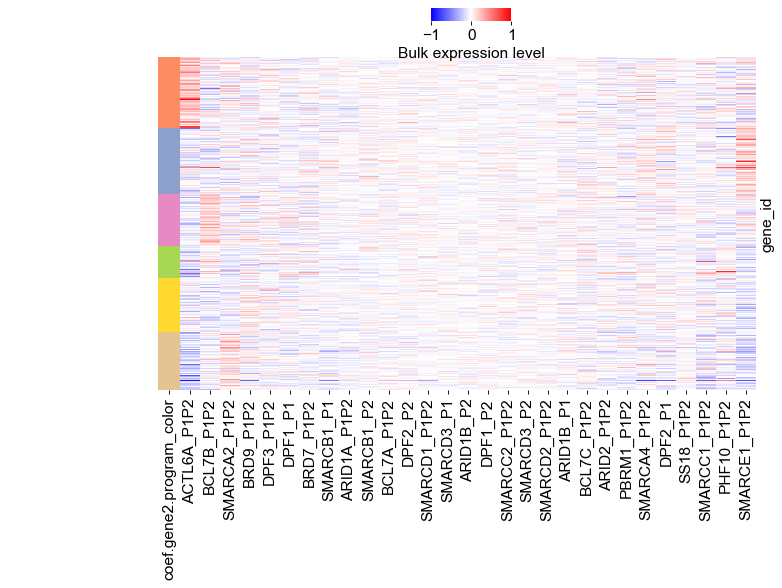

In [58]:
new_sc_bulk=sc_bulk

col_Z = hierarchy.linkage(new_sc_bulk.T,
                     optimal_ordering=True,
                     method='average',
                         )
modelname='k562'
x=1
g=sns.clustermap(new_sc_bulk,col_linkage=col_Z,
               row_cluster=False,
                 col_cluster=True,
               xticklabels=True,
                 yticklabels=False,
               figsize=(10,8),
               cbar_pos=(0.55, 0.9, 0.1, 0.02),
                 cbar_kws={'orientation':'horizontal',
                "label": "Bulk expression level",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x,
              row_colors=adata.var[n+'.gene2.program_color'],
                )
g.ax_col_dendrogram.set_visible(False)
#plt.savefig(FIGS+'single.regMat.'+modelname+'.heatmap.K562.pdf',transparent=True,bbox_inches='tight')
#plt.savefig(FIGS+'single.regMat.'+modelname+'.heatmap.K562.png',transparent=True,bbox_inches='tight')

sorted_perturbs=sc_bulk.iloc[:,g.dendrogram_col.reordered_ind].columns
print(sorted_perturbs)

